# 🐸캐굴캐굴 필사 스터디 4주차
### [CRM Analytics 🛍️🛒](https://www.kaggle.com/code/sercanyesiloz/crm-analytics)
4주차 학습 기간 : 23.02.20 ~ 23.02.26    
주제 : E-Commerce Dataset 분석 
- 멋쟁이사자처럼 AIS7 실습파일 1201~1202 참고

<br> 



### ✅알게 된 내용

- CRM 마케팅 이론
- E-Commerce 데이터 분석
    - MAU, ARPPU 
    - 코호트 분석
    - RFM 분석 
    - Lifetime Value 지표
        - BG/NBD 모델로 예상 거래 예측

# 📌 고객 관계 관리 (CRM) 마케팅

### Customer Relationship Management 
- 고객을 정확히 파악하여 고객이 충성 고객이 될 수 있도록 관리하는 작업 
    - 분석 CRM : 고객의 과거와 현재를 분석하여 미래를 예측
    - 운영 CRM : 분석한 내용들을 바탕으로 고객들에게 실제 캠페인을 실행하고 성과를 창출 

<br>

### ✔️ CRM 분석의 이점
- 고객 서비스 평가
    - CRM 분석을 통해 고객 서비스 팀의 성과를 확인할 수 있다. 
- 정확한 고객 분석
    - CRM 분석을 통해 고객 데이터를 인구 통계학적 마케팅에 사용하거나 이메일 마케팅 등 다양한 작업을 수행할 수 있다. 
- 철저한 고객 분석 
    - 고객이 분기당 얼마를 지불하는지 같은 제품을 계속해서 구매하는지, 아니면 어떤 다양한 상품들을 구매하고 있는지를 CRM 분석을 통해 답변을 얻어볼 수 있다.
    - 데이터를 분석한 결과물을 활용하여 마케팅 전략을 개선할 수 있다.
- 효율적인 새로운 지표 창출 
    - CRM 분석을 통해 고객 유형에 따라 다양한 접근법을 적용하여 매출 향상에 기여할 수 있다. 

<br>

---

### ✔️ Dataset 설명

```
"This is a transnational data set which contains all the transactions 
occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."
```

- 데이터 수집 기간 : 2010년 1월 12일과 2011년 9월 12일 사이 
- 영국에 기반을 두고 등록된 온라인 상점에서 발생하는 모든 거래를 포함하는 데이터 세트.
- 주 고객은 도매상

# Libraries and Utilities

## Install Package

In [3]:
!pip install plotly
!pip install Lifetimes
!pip install nb_black
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", line 167, in exc_lo

In [4]:
# 한글 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [5]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load Libraries

In [6]:
import os
import datetime
import squarify
import pandas as pd 
import numpy as np

import datetime as dt

from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
import koreanize_matplotlib

from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)

from lifetimes import BetaGeoFitter, GammaGammaFitter

from lifetimes.plotting import plot_period_transactions
%matplotlib inline
%load_ext nb_black

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

<IPython.core.display.Javascript object>

# Load and Check Data

In [7]:
base_root = f'/content/drive/MyDrive/캐굴캐굴/4주차'

df = pd.read_csv(os.path.join(base_root, 'data.csv'),
                 header = 0, 
                 encoding = 'unicode_escape',
                 dtype = {'CustomerID': str,
                          'InvoiceID': str},
                 parse_dates = ['InvoiceDate'], 
                 infer_datetime_format = True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<IPython.core.display.Javascript object>

# EDA - Understanding Data


### 📃Variable Description
**InvoiceNo:** 6자리로 구성된 송장 번호, 'c'로 시작할 경우 취소송장      
**StockCode:** 5자리로 구성된 제품 코드 번호     
**Description:** 상품명    
**Quantity:** 매매 건 당 각 제품의 수량   
    -  코드가 ‘-’(마이너스)로 시작하면 취소한 주문   
**InvoiceDate**: 송장 날짜, 각 트랜젝션이 생성된 날짜와 시간      
**UnitPrice**: 물품 개당 제품 가격 (스털링 단위)    
**CustomerID**: 5자리로 구성된 고객 번호 , 고유한 고객 ID를 가진다.    
**Country**: 각 고객의 거주 국가    

In [8]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print()
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print()
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print()
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print()
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print()
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------

Rows: 541909
Columns: 8

------------------------------- TYPES --------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-0

<IPython.core.display.Javascript object>

### 매출액 상위 국가

In [9]:
df["TotalPrice"] = df["UnitPrice"] * df["Quantity"]
df.groupby("Country")["TotalPrice"].agg(
    ["mean", "sum"]).nlargest(10, "sum").style.format("{:,.0f}")

,mean,sum
Country,,
United Kingdom,17,"8,187,806"
Netherlands,120,"284,662"
EIRE,32,"263,277"
Germany,23,"221,698"
France,23,"197,404"
Australia,109,"137,077"
Switzerland,28,"56,385"
Spain,22,"54,775"
Belgium,20,"40,911"


<IPython.core.display.Javascript object>

### 국가별 주문량

In [10]:
# Country 는 구매 고객의 거주국
world_map = df[['CustomerID', 'InvoiceNo', 'Country']
              ].groupby(['CustomerID', 'InvoiceNo', 'Country']
                       ).count().reset_index(drop = False)

countries = world_map['Country'].value_counts()
countries

United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Iceland                     7
Israel                      6
Canada                      6
Greece                      6
Czech Republic              5
European Community          5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Bahrain   

<IPython.core.display.Javascript object>

In [11]:
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

<IPython.core.display.Javascript object>

영국이 주요 고객층

### 결측치 여부

<AxesSubplot:>

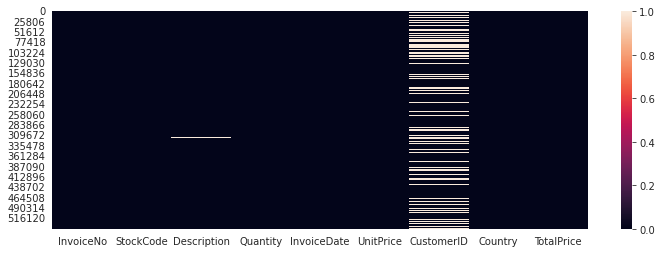

<IPython.core.display.Javascript object>

In [12]:
# 결측치를 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull())

### Descriptive Statistics

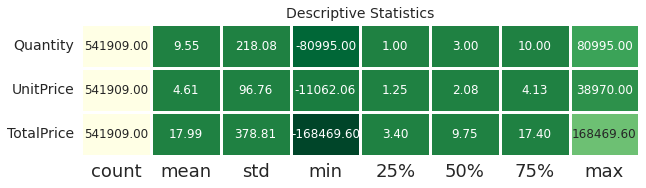

<IPython.core.display.Javascript object>

In [13]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "YlGn_r",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df.select_dtypes(include = [float, int]))

In [14]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,406829,541909
unique,25900,4070,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2313,2369,7983,495478


<IPython.core.display.Javascript object>

### 회원 vs 비회원 구분
-  CustomerID값이 결측치인 값에 대한 Country값 비교 

In [15]:
# CustomerID값이 결측치인 값에 대한 Country값 빈도 수
df.loc[df["CustomerID"].isnull(), "Country"].value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# CustomerID값이 결측치가 아닌 값에 대한 Country값 빈도 수
df.loc[df["CustomerID"].notnull(), "Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

<IPython.core.display.Javascript object>

### 구매 취소 비율 


In [17]:
df[df["Quantity"] < 0].head(2)
df["Cancel"] = df["Quantity"] < 0
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False


<IPython.core.display.Javascript object>

In [18]:
# 고객별 구매취소 비율 상위 CustomerID 10개
df.groupby("CustomerID")["Cancel"].value_counts().unstack().nlargest(10, False)실

Cancel,False,True
CustomerID,,
17841,7847.0,136.0
14911,5677.0,226.0
14096,5111.0,17.0
12748,4596.0,46.0
14606,2700.0,82.0
15311,2379.0,112.0
14646,2080.0,5.0
13089,1818.0,39.0
13263,1677.0,NaN


<IPython.core.display.Javascript object>

#### 특정 고객의 구매 취소 건 조회

In [19]:
df[df["CustomerID"] == '17841']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841,United Kingdom,-2.10,True
1442,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2010-12-01 14:30:00,0.85,17841,United Kingdom,-1.70,True
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841,United Kingdom,10.50,False
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841,United Kingdom,2.90,False
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841,United Kingdom,1.45,False
...,...,...,...,...,...,...,...,...,...,...
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841,United Kingdom,2.55,False
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841,United Kingdom,5.04,False
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841,United Kingdom,4.25,False
537752,581334,22309,TEA COSY RED STRIPE,1,2011-12-08 12:07:00,2.55,17841,United Kingdom,2.55,False


<IPython.core.display.Javascript object>

### 제품별 구매취소율

In [20]:
cancel_stock = df.groupby(["StockCode"]).agg({"InvoiceNo":"count", "Cancel": "mean"})
cancel_stock.columns = ["count", "mean"]
cancel_stock.nlargest(10, "count")

,count,mean
StockCode,,
85123A,2313,0.018591
22423,2203,0.083522
85099B,2159,0.020380
47566,1727,0.011581
20725,1639,0.026846
84879,1502,0.008655
22720,1477,0.051456
22197,1476,0.033875
21212,1385,0.010830


<IPython.core.display.Javascript object>

### 국가별 구매취소율

In [21]:
cancel_country = df.groupby("Country").agg({"InvoiceNo": "count", "Cancel": "mean"})
cancel_country.nlargest(10, "Cancel")

,InvoiceNo,Cancel
Country,,
USA,291,0.384880
Czech Republic,30,0.166667
Malta,127,0.118110
Japan,358,0.103352
Saudi Arabia,10,0.100000
Australia,1259,0.058777
Italy,803,0.056040
Bahrain,19,0.052632
Germany,9495,0.047709


<IPython.core.display.Javascript object>

### EDA 결론
📌 Quantity 및 UnitPrice에 처리해야 할 Oliter가 있다.        
📌 취소된 주문으로 인해 단가와 수량에 음수 값이 포함되어 있다.      
📌 Customer ID 와 Description에 결측치가 포함되어 있다.         
📌 Total Price라는 파생변수를 생성해보자!(수량X단가)           

# Datetime

## 날짜와 시간 파생변수 생성
-  InvoiceDate를 datetime 모듈로 datetime type으로 변환

In [22]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

<IPython.core.display.Javascript object>

- year, month, day 파생변수 생성

In [23]:
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,False,2010,12,1,2


<IPython.core.display.Javascript object>

- year-month 형태로 새로 추출

In [24]:
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]
df[["InvoiceDate", "InvoiceYM"]].sample(3)

,InvoiceDate,InvoiceYM
283376,2011-07-29 11:49:00,2011-07
334458,2011-09-11 12:13:00,2011-09
212621,2011-06-03 15:31:00,2011-06


<IPython.core.display.Javascript object>

- time과 hour에 대한 파생변수 생성

In [25]:
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,False,2010,12,1,2,2010-12,08:26:00,8


<IPython.core.display.Javascript object>

## EDA

### 연도 (InvoiceYear)별 구매 빈도수

<AxesSubplot:xlabel='InvoiceYear', ylabel='count'>

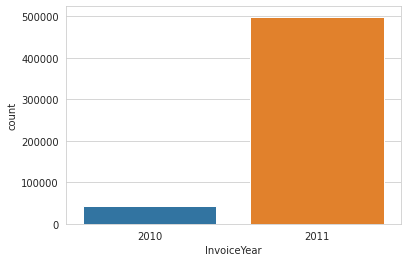

<IPython.core.display.Javascript object>

In [26]:
sns.countplot(data=df, x="InvoiceYear")

### 월(InvoiceMonth) 별 구매 빈도수

<AxesSubplot:xlabel='InvoiceMonth', ylabel='count'>

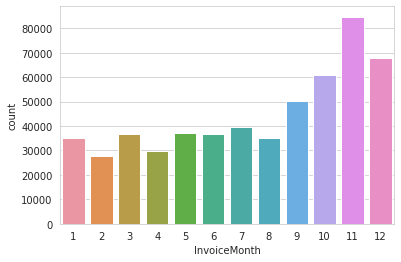

<IPython.core.display.Javascript object>

In [27]:
sns.countplot(data=df, x="InvoiceMonth")

### 연도-월별(InvoiceYM) 구매 빈도수

<AxesSubplot:xlabel='InvoiceYM', ylabel='count'>

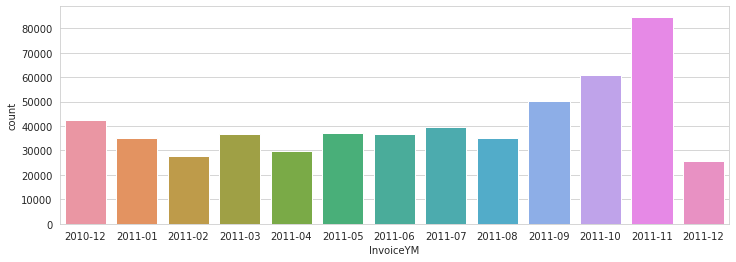

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceYM")

### 요일별 구매 빈도수


<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

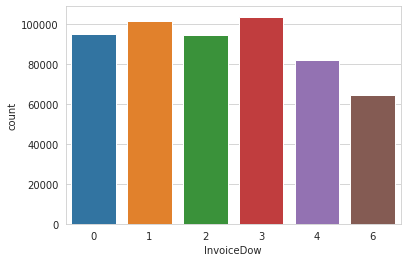

<IPython.core.display.Javascript object>

In [29]:
sns.countplot(data=df, x="InvoiceDow")

### 요일별 구매와 취소 빈도수 

<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

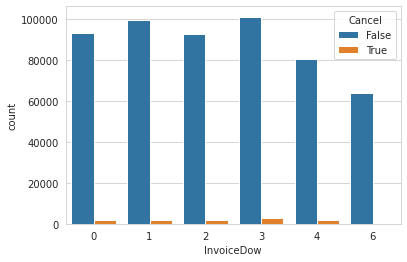

<IPython.core.display.Javascript object>

In [30]:
sns.countplot(data=df, x="InvoiceDow", hue="Cancel")

<AxesSubplot:title={'center':'Day of week - Cancel'}, xlabel='InvoiceDow', ylabel='count'>

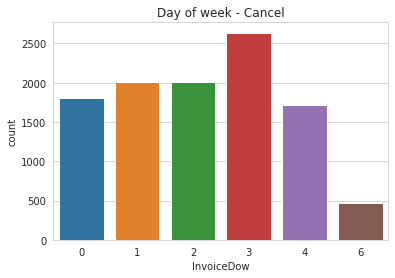

<IPython.core.display.Javascript object>

In [31]:
plt.title("Day of week - Cancel")
sns.countplot(data=df[df["Cancel"]], x="InvoiceDow")

<AxesSubplot:>

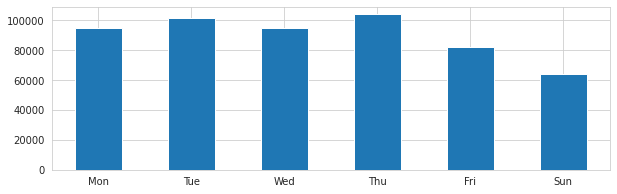

<IPython.core.display.Javascript object>

In [32]:
day_name =  [w for w in "Mon Tue Wed Thu Fri Sun".split(' ')]

dow_count = df["InvoiceDow"].value_counts().sort_index()
dow_count.index = day_name
dow_count.plot.bar(rot=0, figsize=(10, 3))

### 시간대( InvoiceHour )별 구매 빈도수

<AxesSubplot:xlabel='InvoiceHour', ylabel='count'>

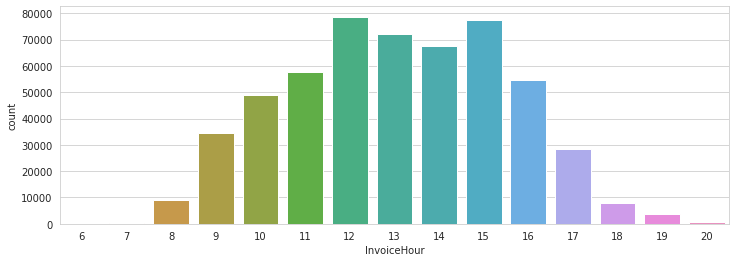

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceHour")

<AxesSubplot:xlabel='InvoiceHour', ylabel='TotalPrice'>

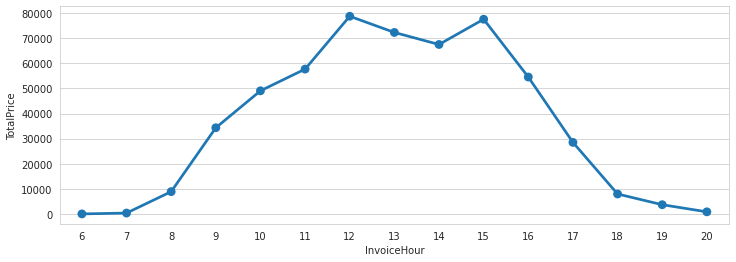

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="InvoiceHour", y="TotalPrice", estimator=len, ci=None)

### 시간-요일별 빈도수


#### crosstab

In [35]:
hour_dow = pd.crosstab(index=df["InvoiceHour"], columns=df["InvoiceDow"])
hour_dow.columns = day_name
hour_dow.style.background_gradient(cmap="Greens").format("{:,}")

,Mon,Tue,Wed,Thu,Fri,Sun
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,"1,641","1,751","1,826","1,834","1,857",0
9,"7,497","6,440","5,186","8,060","7,119",30
10,"8,872","9,125","7,904","9,321","10,215","3,600"
11,"8,926","10,052","9,973","8,369","9,589","10,765"
12,"11,801","14,327","14,527","13,485","10,942","13,627"
13,"12,756","12,619","11,901","12,428","10,488","12,067"
14,"11,502","11,656","11,006","11,518","11,737","10,052"


<IPython.core.display.Javascript object>

#### heatmap

<AxesSubplot:ylabel='InvoiceHour'>

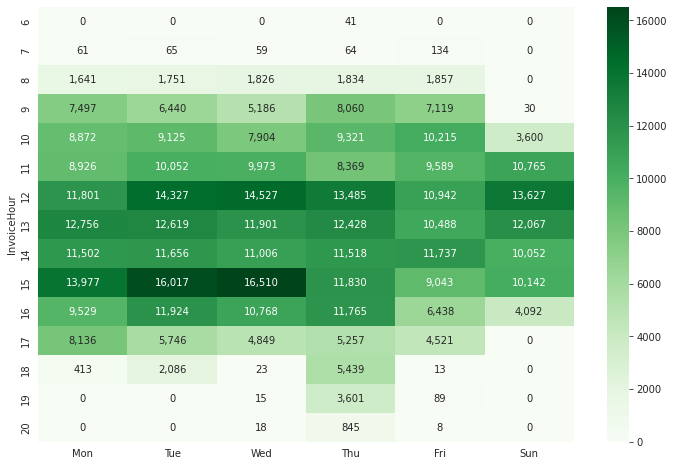

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(hour_dow, annot=True, fmt=",.0f", cmap="Greens")

#### subplots

<AxesSubplot:xlabel='InvoiceHour'>

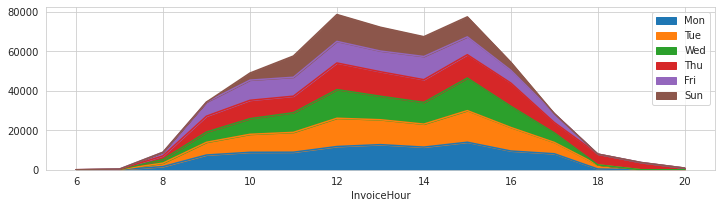

<IPython.core.display.Javascript object>

In [37]:
# 시간별_요열별 구매 주문 시각화
hour_dow.plot.area(figsize=(12, 3))

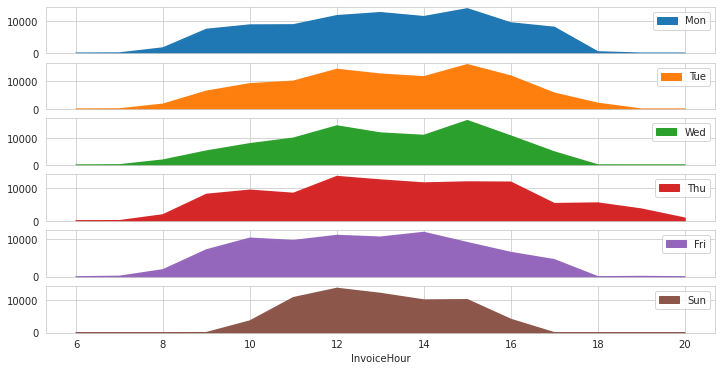

<IPython.core.display.Javascript object>

In [38]:
hour_dow.plot.area(figsize=(12, 6), subplots=True);

전체적으로 평일에, 오후 시간대에 주문 건수가 많았다. 

# Data Preprocessing
- 사용한 전처리 기법
    - IQR을 활용한 데이터 자르기
        - 이상치 제거 
            - q1 = 0.01
            - q3 = 0.99
    - 결측치 제거하기
    - 주문이 취소되어 C로 표기된 송장 데이터와 음수로 기록된 데이터 모두 제거 
    - 총 주문 가격 파생변수 생성  
        - ```TotalPrice``` = ```UnitPrice``` * ```Quantity```

In [39]:
def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    df_ = dataframe.copy()

    # 사분위계수 IQR 계산 
    qu1 = df_[variable].quantile(q1)
    qu3 = df_[variable].quantile(q3)
    iqr = qu3 - qu1

    iqr_max = qu3 + 1.5 * iqr
    iqr_min = qu1 - 1.5 * iqr
    df_.loc[(df_[variable] < iqr_min), variable] = iqr_min
    df_.loc[(df_[variable] > iqr_max), variable] = iqr_max
    
    return df_


def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy()
    
    # 결측치 제거 
    df_ = df_.dropna()
    
    #Cancelled Orders & Quantity
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_[df_["CustomerID"].notnull() & (df_["Quantity"] > 0) & (df_["UnitPrice"] > 0)]

    #Replacing Outliers
    df_ = replace_with_thresholds(df_, "Quantity", q1 = 0.01, q3 = 0.99)
    df_ = replace_with_thresholds(df_, "UnitPrice", q1 = 0.01, q3 = 0.99)

    #Drop duplicates
    df_ = df_.drop_duplicates()
    
    return df_

<IPython.core.display.Javascript object>

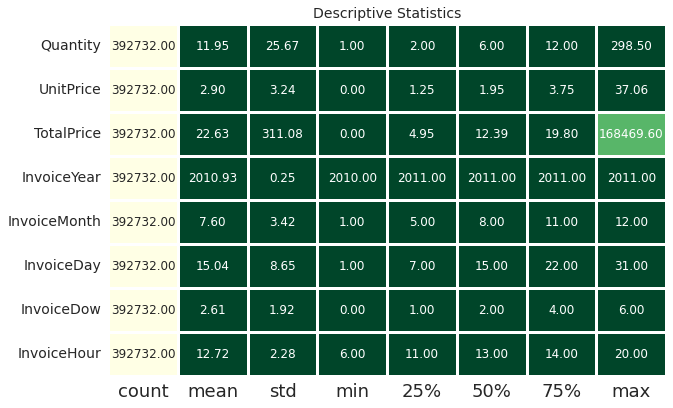

<IPython.core.display.Javascript object>

In [40]:
df_valid = ecommerce_preprocess(df)

desc_stats(df_valid.select_dtypes(include = [float, int]))

In [41]:
df.shape, df_valid.shape

((541909, 17), (392732, 17))

<IPython.core.display.Javascript object>

# ARPU (Average Revenue Per User) 
**📝 가입자 당 평균 매출 (ARPU)**

- 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액

- ```매출 / 중복을 제외한 순수 활동 사용자 수```

# ARPPU (Average Revenue Per Paying User)
**📝 지불 유저 별 결제금액 (ARPPU)**


- 지불 유저 1명 당 **한 달**에 결제하는 평균 금액을 산정한 수치

- F2P(부분 유료, Free to Play) 게임에서 수익 지표로 자주 활용되는 수치 

- 다양한 부가 서비스 아이템을 도입하거나 월 정액 과금 방식을 사용하는 리니지 처럼 월 정액 과금에 부분 유료 아이템을 추가적으로 판매해 ARPPU를 끌어올릴 수 있다.

- ```기준 기간 총 수익 / 기준 기간 당 구매 고객 수```

In [42]:
arppu = df_valid.groupby("InvoiceYM").agg({
    "TotalPrice":"sum", "CustomerID": "nunique"})
arppu.head()

,TotalPrice,CustomerID
InvoiceYM,,
2010-12,570422.730,885
2011-01,568101.310,741
2011-02,446084.920,758
2011-03,594081.760,974
2011-04,468374.331,856


<IPython.core.display.Javascript object>

In [43]:
arppu.columns = ["sale_sum", "customer_count"]
arppu["ARPPU"] = arppu["sale_sum"] / arppu["customer_count"]
arppu.style.format("{:,.1f}")

,sale_sum,customer_count,ARPPU
InvoiceYM,,,
2010-12,"570,422.7",885.0,644.5
2011-01,"568,101.3",741.0,766.7
2011-02,"446,084.9",758.0,588.5
2011-03,"594,081.8",974.0,609.9
2011-04,"468,374.3",856.0,547.2
2011-05,"677,355.2","1,056.0",641.4
2011-06,"660,046.1",991.0,666.0
2011-07,"598,962.9",949.0,631.2
2011-08,"644,051.0",935.0,688.8


<IPython.core.display.Javascript object>

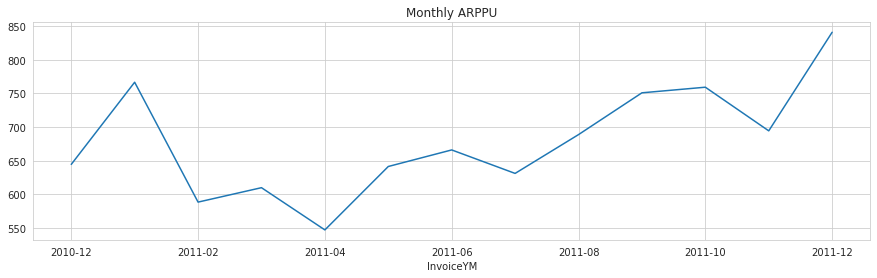

<IPython.core.display.Javascript object>

In [44]:
arppu["ARPPU"].plot(figsize=(15, 4), title="Monthly ARPPU");

2011년 7월~10월, 2011년 11월 ~ 12월에 평균 구매액이 증가하는 구간 

# MAU (Monthly Active User)
- 월별 활동한 이용자를 의미 
- 한 달에 몇 명이나 이 서비스를 이용하는지에 대해서 구분할 때에 사용
- 사용자 키가 있는 경우에 그 기준으로 구성되는 지표로, 회원수랑은 다르다.
- 보통 해당 서비스가 확보하고 있는 사용자의 총 수를 의미

In [45]:
cust_agg = df_valid.groupby(["CustomerID"]).agg({
    "InvoiceNo":["nunique", "count"], 
    "TotalPrice":["mean", "sum"]})

cust_agg.columns = ["nunique", "count", "mean", "sum"]

<IPython.core.display.Javascript object>

MAU 산정 기준은 보통 로그인 수로도 계산 가능하지만, 해당 데이터 셋에는 **구매한 데이터**만 있기 때문에 구매 건수로 지정. 

<AxesSubplot:title={'center':'MAU(Monthly Active User)'}, xlabel='InvoiceYM'>

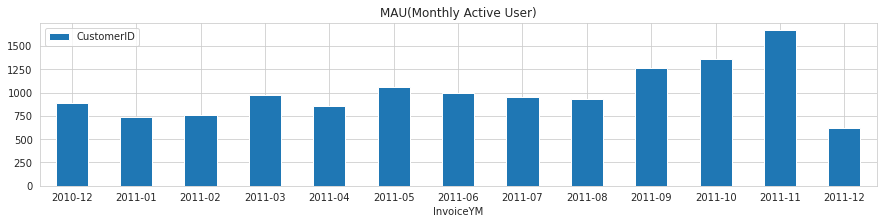

<IPython.core.display.Javascript object>

In [46]:
mau = df_valid.groupby(["InvoiceYM"]).agg({"CustomerID": "nunique"})
mau.plot.bar(figsize=(15, 3), rot=0, title="MAU(Monthly Active User)")

2011년 9월에서 11월 구매 건수가 증가하였다. 

# Cohort Analysis
코호트 분석이란?
- 앱 가입 날짜, 첫 구매 월, 위치, 획득 채널(유기 사용자, 공연 마케팅에서 오는 것 등) 등과 같은 공통점을 공유하는 사람들의 그룹을 시간 경과에 따라 추적하여 몇 가지 일반적인 패턴 또는 행동을 식별하는 분석 방법.
- 리텐션 분석 : 같은 기간에 앱 설치를 경험한 사용자 그룹이 시간이 지남에 따라 앱의 꾸준한 사용 여부(Retention)를 분석

## 첫 구매일로부터 몇 달째 구매인지 계산 
기준 : 월 

In [47]:
df_valid["해당구매월"] = pd.to_datetime(df_valid["InvoiceYM"])
df_valid[["InvoiceDate", "해당구매월"]].sample(5)

,InvoiceDate,해당구매월
314744,2011-08-26 14:17:00,2011-08-01
218122,2011-06-08 11:56:00,2011-06-01
121706,2011-03-16 16:38:00,2011-03-01
168260,2011-04-26 11:04:00,2011-04-01
80309,2011-02-02 15:57:00,2011-02-01


<IPython.core.display.Javascript object>

- 최초 구매월 계산

In [48]:
df_valid["최초구매월"] = df_valid.groupby("CustomerID")["해당구매월"].transform("min")
df_valid[["CustomerID", "InvoiceDate", "최초구매월", "해당구매월"]].sample(5)

,CustomerID,InvoiceDate,최초구매월,해당구매월
109606,14670,2011-03-04 13:58:00,2011-03-01,2011-03-01
164743,12530,2011-04-20 09:31:00,2011-01-01,2011-04-01
477781,14362,2011-11-17 15:08:00,2011-11-01,2011-11-01
338956,13488,2011-09-13 12:52:00,2010-12-01,2011-09-01
432224,16825,2011-11-01 11:51:00,2011-06-01,2011-11-01


<IPython.core.display.Javascript object>

- 연도별 차이( year_diff )와 월별 차이( month_diff ) 계산

In [49]:
year_diff = df_valid["해당구매월"].dt.year - df_valid["최초구매월"].dt.year
month_diff = df_valid["해당구매월"].dt.month - df_valid["최초구매월"].dt.month

<IPython.core.display.Javascript object>

- " 연도차이 * 12개월 + 월차이 + 1 "로 첫 구매 후 몇달 후 구매인지 알 수 있도록 파생변수 생성 

In [50]:
df_valid["CohortID"] = (year_diff * 12) + month_diff + 1
df_valid[["CustomerID", "해당구매월", "최초구매월", "CohortID"]].sample(5)

,CustomerID,해당구매월,최초구매월,CohortID
280927,14534,2011-07-01,2011-01-01,7
537026,15443,2011-12-01,2011-01-01,12
135423,18118,2011-03-01,2010-12-01,4
453964,14895,2011-11-01,2011-02-01,10
225362,17841,2011-06-01,2010-12-01,7


<IPython.core.display.Javascript object>

### 코호트 월별 빈도수

In [51]:
df_valid["CohortID"].value_counts().sort_index()

1     116868
2      27519
3      26729
4      26995
5      25166
6      26676
7      23462
8      23298
9      22762
10     22969
11     20100
12     23015
13      7173
Name: CohortID, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='CohortID', ylabel='count'>

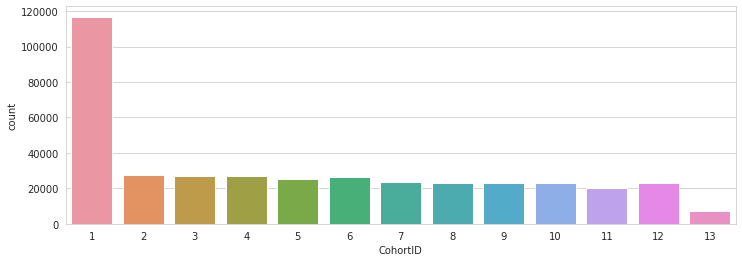

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x="CohortID")

### 잔존 빈도 계산

In [53]:
cohort_count = df_valid.groupby(["최초구매월", "CohortID"])["CustomerID"].nunique().unstack()
cohort_count.index = cohort_count.index.astype(str).str[:7]
cohort_count

CohortID,1,2,3,4,5,6,7,8,9,10,11,12,13
최초구매월,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='CohortID', ylabel='최초구매월'>

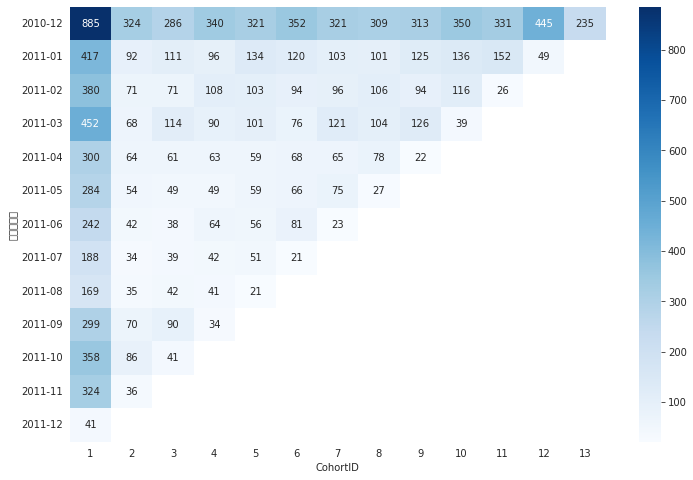

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot=True, fmt=".0f", cmap="Blues")

1년 11월에 발생한 첫 구매는(323건) 전월인 10월(358건) 대비 줄었지만, 재구매가 전반적으로 증가한 것으로 보아 신규 유저 대상이 아니라 휴면 유저 혹은 기존에 구매 이력이 있는 유저들 대상으로 이벤트를 진행했다고 볼 수 있지 않을까하는 추측




## 월별 신규 유입 고객의 잔존율 

<AxesSubplot:title={'center':'월별 신규 유입 수'}, xlabel='최초구매월'>

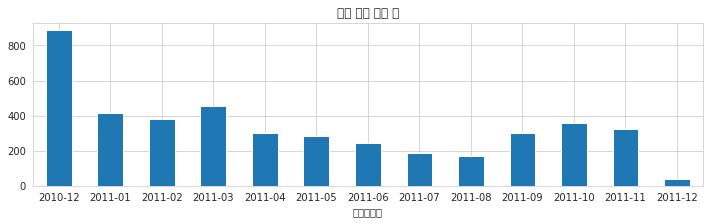

<IPython.core.display.Javascript object>

In [55]:
# 월별 신규 유입 고객 수
cohort_count[1].plot.bar(figsize=(12, 3), title="월별 신규 유입 수", rot=0)

- 가입한 달을 1로 나누면 잔존률을 구할 수 있습니다.
- ```div()``` 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나눈다.

In [56]:
cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

CohortID,1,2,3,4,5,6,7,8,9,10,11,12,13
최초구매월,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='CohortID', ylabel='최초구매월'>

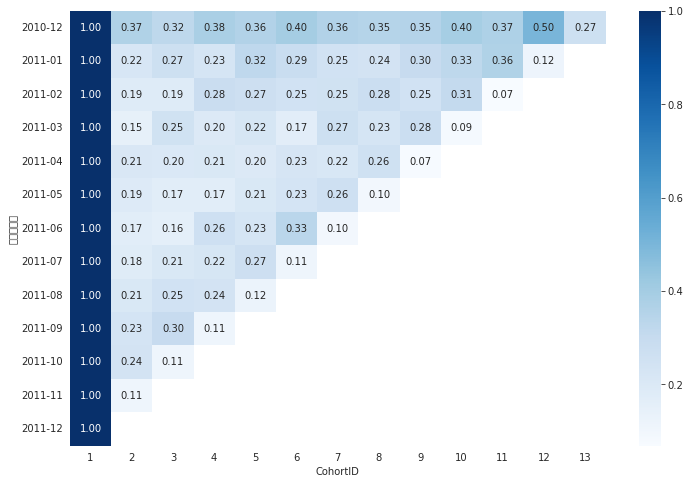

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_norm, annot=True, fmt=".2f", cmap="Blues")

## Monthly Cohorts: User Retention
- https://www.kaggle.com/code/sercanyesiloz/crm-analytics의 코호트 분석 사용자 지정 함수 


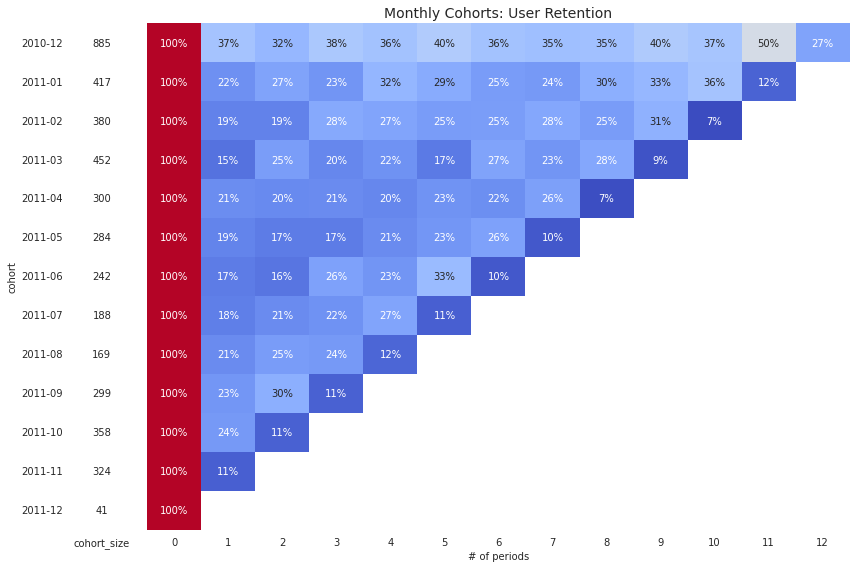

<IPython.core.display.Javascript object>

In [58]:
def CohortAnalysis(dataframe):

    data = dataframe.copy()
    data = data[["CustomerID", "InvoiceNo", "InvoiceDate"]].drop_duplicates()
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")
    
    data["cohort"] = (
        data.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
    )

    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("CustomerID", "nunique"))
        .reset_index(drop=False)
    )
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )

    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )

    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()
    
CohortAnalysis(df_valid)

#### 📌 차트 해석
- 가장 왼쪽 열은 월별 구매 고객 수 
- 리텐션 계산 방법 : Month N 고객 수 / Month 1 고객 수 
- 세로 방향을 본다면, 같은 기간이 지난 후 cohort 간 리텐션을 비교할 수 있음
    - 한달이 지난 후의 잔존율
- 대각선 방향으로 본다면, 같은 시간대 cohort 간 비교를 할 수 있음
    - 2011년 10~ 11월에 뭔가 이벤트를 진행했었던 것 같다. 
    - 2011년 10월 기준으로 잔존율을 대각선으로 쭉 올라가면서 이전 달과 비교했을때 비율이 증가했음을 알 수 있었다.  

# RFM Analysis
### ✅ RFM 분석이란? 
- 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법

- 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나

- 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법

- 분석과정을 통해 데이터를 의미있는 정보로 전환한다.
   
<br>

### 📝 RFM의 기준

: Recency, Frequency, Monetary

고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다. 

​

Recency - 거래의 최근성: 고객이 얼마나 **최근에** 구입했는가?

Frequency - 거래빈도: 고객이 얼마나 **자주** 우리 상품을 구입했나?

Monetary - 거래규모: 고객이 구입했던 **총 금액(Total_Price)**은 어느 정도인가?

## RFM Metrics

In [59]:
df= ecommerce_preprocess(df)

<IPython.core.display.Javascript object>

In [60]:
print(f"가장 오래된 거래 : {df['InvoiceDate'].min()}\n가장 최근 거래 : {df['InvoiceDate'].max()}")

가장 오래된 거래 : 2010-12-01 08:26:00
가장 최근 거래 : 2011-12-09 12:50:00


<IPython.core.display.Javascript object>

고객 별로 얼마나 최근에, 자주, 얼마씩 구매했는지 구해보자!

In [61]:
today_date = dt.datetime(2011,12,11)
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days, # 기준일로부터 가장 최근 구매한 날짜랑 얼마나 차이나는지 
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()

rfm[rfm['monetary'] > 0]

,CustomerID,recency,frequency,monetary
0,12346,326,1,77183.60
1,12347,3,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40
...,...,...,...,...
4333,18280,278,1,180.60
4334,18281,181,1,80.82
4335,18282,8,2,178.05
4336,18283,4,16,2045.53


<IPython.core.display.Javascript object>

### RFM Scores

In [62]:
def rfm_scores(dataframe):

    df_ = dataframe.copy()
    df_["R"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["F"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["M"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["R"].astype(str) + df_["F"].astype(
        str
    )

    return df_


rfm_score = rfm_scores(rfm)
rfm_score 

,CustomerID,recency,frequency,monetary,R,F,M,RFM_SCORE
0,12346,326,1,77183.60,1,1,5,11
1,12347,3,7,4310.00,5,5,5,55
2,12348,76,4,1797.24,2,4,4,24
3,12349,19,1,1757.55,4,1,4,41
4,12350,311,1,334.40,1,1,2,11
...,...,...,...,...,...,...,...,...
4333,18280,278,1,180.60,1,2,1,12
4334,18281,181,1,80.82,1,2,1,12
4335,18282,8,2,178.05,5,3,1,53
4336,18283,4,16,2045.53,5,5,4,55


<IPython.core.display.Javascript object>

## 고객 세그먼트 분류(RFM)

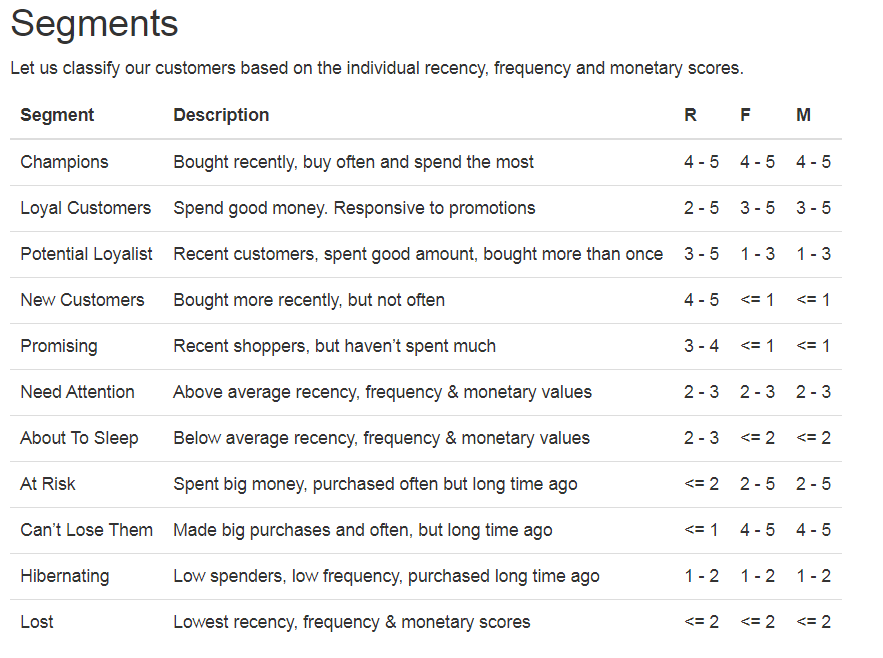



In [63]:
# 고객 세그먼트 분류
seg_map = {r'[1-2][1-2]': 'hibernating', # "가장 오래된, 저조한 구매 빈도와 구매 총액
           r'[1-2][3-4]': 'at_Risk', # 큰 돈을 자주 썼지만 아주 오래 전 고객
           r'[1-2]5': 'cant_loose', # 가끔씩 큰 금액의 구매가 이루어졌지만 오래 전 고객 
           r'3[1-2]': 'about_to_sleep', # 평균 RFM스코어 미만
           r'33': 'need_attention', # 평균 RFM스코어 이상 
           r'[3-4][4-5]': 'loyal_customers', # 큰 돈을 쓰는 프로모션에 바로 반응하는 고객층
           r'41': 'promising', # 최근 구매 고객들, 그러나 소비 빈도는 적다
           r'51': 'new_customers', # 신규 고객들, 자주 구매 x 
           r'[4-5][2-3]': 'potential_loyalists', # 최근 구매 고객들 중 구매 총액이 높고 한 번 이상 구매.
           r'5[4-5]': 'champions'} # 최근에 구입하고, 자주 구입하고, 가장 많이 소비하는 고객층.

seg_map_kr = {r'[1-2][1-2]': '휴면 고객', # "가장 오래된, 저조한 구매 빈도와 구매 총액
           r'[1-2][3-4]': '떠나면 위험한 고객', # 큰 돈을 자주 썼지만 아주 오래 전 고객
           r'[1-2]5': '붙잡아야할 고객', # 가끔씩 큰 금액의 구매가 이루어졌지만 오래 전 고객 
           r'3[1-2]': '휴면 직전 고객', # 평균 RFM스코어 미만
           r'33': '신경써야 할 고객', # 평균 RFM스코어 이상 
           r'[3-4][4-5]': '충성 VIP', # 큰 돈을 쓰는 프로모션에 바로 반응하는 고객층
           r'41': '유망 고객', # 최근 구매 고객들, 그러나 소비 빈도는 적다
           r'51': '신규 고객', # 신규 고객들, 자주 구매 x 
           r'[4-5][2-3]': '잠재 VIP', # 최근 구매 고객들 중 구매 총액이 높고 한 번 이상 구매.
           r'5[4-5]': 'VIP'} # 최근에 구입하고, 자주 구입하고, 가장 많이 소비하는 고객층.

rfm_score['segment'] = rfm_score['RFM_SCORE'].replace(seg_map, regex = True)
rfm_score['고객분류'] = rfm_score['RFM_SCORE'].replace(seg_map_kr, regex = True)
rfm_score.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM_SCORE,segment,고객분류
0,12346,326,1,77183.60,1,1,5,11,hibernating,휴면 고객
1,12347,3,7,4310.00,5,5,5,55,champions,VIP
2,12348,76,4,1797.24,2,4,4,24,at_Risk,떠나면 위험한 고객
3,12349,19,1,1757.55,4,1,4,41,promising,유망 고객
4,12350,311,1,334.40,1,1,2,11,hibernating,휴면 고객


<IPython.core.display.Javascript object>

### Segmentation Map

In [77]:
rfm_score['고객분류'].value_counts().sort_values(ascending=False)

휴면 고객         1071
충성 VIP         819
VIP            633
떠나면 위험한 고객     593
잠재 VIP         484
휴면 직전 고객       352
신경써야 할 고객      187
유망 고객           94
붙잡아야할 고객        63
신규 고객           42
Name: 고객분류, dtype: int64

<IPython.core.display.Javascript object>

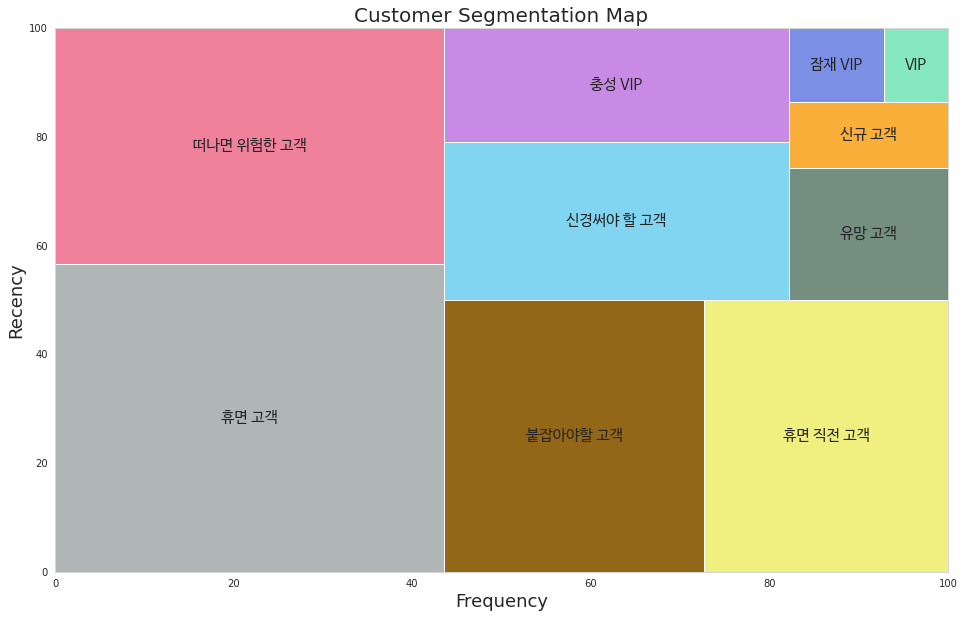

<IPython.core.display.Javascript object>

In [64]:
segments = rfm_score['고객분류'].value_counts().sort_values(ascending=False)

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
plt.rc('font', family='NanumBarunGothic') 

squarify.plot(
    sizes=segments,
    label=[label for label in seg_map_kr.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)

plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

#### 어떻게 활용?
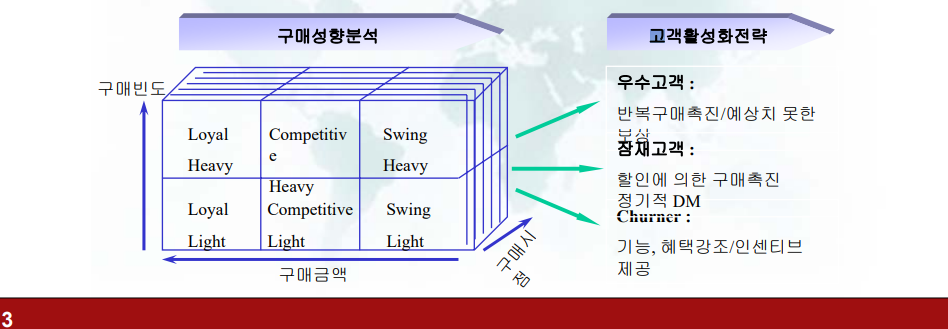

출처 : http://contents.kocw.or.kr/document/gs/2010/01/05/09_CRM.pdf

## Model Evaluation

In [65]:
print(' RFM Model Evaluation '.center(70, '='))

X = rfm_score[['R', 'F']]

labels = rfm_score['고객분류']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')

print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 4338
Number of Segments: 10
Silhouette Score: 0.471
Calinski Harabasz Score: 4590.526
Davies Bouldin Score: 0.633 


<IPython.core.display.Javascript object>

### Segment Analysis

In [66]:
rfm_score[['recency','frequency','monetary','고객분류']].groupby('고객분류').agg({'mean','std','max','min'})

recency                             frequency                  \
               min        mean  max        std       min       mean  max   
고객분류                                                                       
VIP              1    6.361769   13   3.683300         3  12.417062  210   
떠나면 위험한 고객      73  153.785835  374  68.618828         2   2.878583    6   
붙잡아야할 고객        73  132.968254  373  65.250378         6   8.380952   34   
신경써야 할 고객       34   52.427807   72  11.552074         2   2.326203    3   
신규 고객            1    7.428571   13   3.902112         1   1.000000    1   
유망 고객           15   23.510638   33   5.192519         1   1.000000    1   
잠재 VIP           1   17.398760   33   9.338808         1   2.010331    3   
충성 VIP          15   33.608059   72  15.577050         3   6.479853   63   
휴면 고객           73  217.605042  374  92.013560         1   1.101774    2   
휴면 직전 고객        34   53.312500   72  10.943474         1   1.161932    2   

                      monetary                                        
                  std      min         mean        max           std  
고객분류                                                                  
VIP         16.476484   201.12  6843.160521  280206.02  20332.601117  
떠나면 위험한 고객   0.954415    52.00  1080.920373   44534.30   2561.314798  
붙잡아야할 고객     4.289630    70.02  2790.101429   10254.18   2092.026277  
신경써야 할 고객    0.470081     6.90   892.505936   12601.83   1100.222285  
신규 고객        0.000000    89.94   385.022381    3861.00    570.957168  
유망 고객        0.000000    30.00   292.050213    1757.55    238.336949  
잠재 VIP       0.651401    20.80  1036.483099  168472.50   7656.330693  
충성 VIP       4.545669    36.56  2855.791173  124914.53   6002.889994  
휴면 고객        0.302492     3.75   487.628909   77183.60   2419.693767  
휴면 직전 고객     0.368913     6.20   469.893437    6207.67    533.546574

<IPython.core.display.Javascript object>

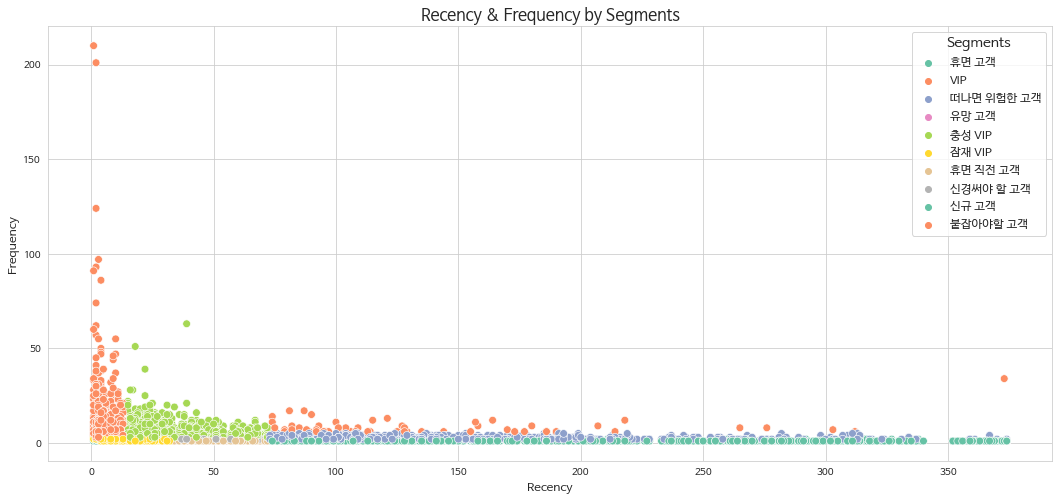

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm_score, x="recency", y="frequency", hue="고객분류", palette=palette, s=60
)

plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)

plt.xticks(size=10)
plt.yticks(size=10)

plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

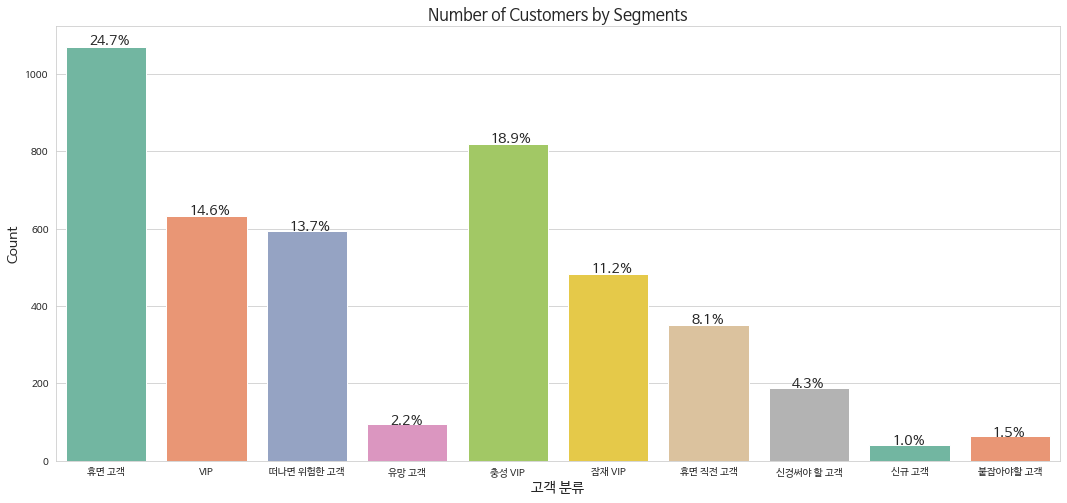

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize = (18, 8))

ax = sns.countplot(data = rfm_score,
                   x = '고객분류',
                   palette = palette)

total = len(rfm_score.고객분류)

for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    
    ax.annotate(percentage, (x, y), size = 14)


plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('고객 분류', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

# Customer Lifetime Value
- 고객이 유료 고객으로서 전체 기간 동안 해당 브랜드에 얼마나 많은 돈을 가져다 줄 것인지를 나타낸다. 

## LTV (Life Time Value) 지표
- LTV는 Lifetime Value, “고객의 생애 가치”라고 불리는 지표로, 고객이 평생동안 기업에게 어느 정도의 가치를 가져다 주는지를 정량화한 지표. 
- 이 LTV는 확률 기반 모형으로 특정한 시점 t에서 고객마다 어느 정도의 생애 가치를 가지는지 측정한다. 


```
고객의 과거 구매 정보
- 첫 구매 ~ 집계일까지의 시간 (Time): T
- 첫 구매 ~ 마지막 구매까지의 시간 (Recency): tx−t0
- 첫 구매 ~ 집계일까지의 구매 횟수 (Frequency): x
- 구매 건마다의 구매 금액 (Monetary Value): mx


```
- **미래의 예상 구매 횟수** 는 첫 구매 ~ 집계일까지의 시간 (Time), RFM의 정보를 가지고 ```BG/NBD```라는 모델로 추정
- **미래의 예상 평균 수익**은 구매 금액 (Monetary Value)의 정보를 가지고 Gamma-Gamma 모델로 추정

In [69]:
cltv_df = df.groupby("CustomerID").agg(
    {
        "InvoiceDate": [
            # 첫 구매와 마지막 구매까지의 시간 
            lambda x: (x.max() - x.min()).days,
            # 첫 구매와 집계일 까지의 시간 
            lambda x: (today_date - x.min()).days,
        ],
        "InvoiceNo": "nunique",
        "TotalPrice": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12346,0,326,1,77183.60
12347,365,368,7,4310.00
12348,282,359,4,1797.24
12349,0,19,1,1757.55
12350,0,311,1,334.40


<IPython.core.display.Javascript object>

In [70]:
#Average Order Value
# 거래가격
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Time
# 첫 구매 ~ 집계일까지의 시간
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
#빈도수
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

<IPython.core.display.Javascript object>

## BG/NBD
참고 링크 :[LTV (Life Time Value) 지표 속 BG/NBD 모델과 Gamma-Gamma 모델 파헤치기](https://assaeunji.github.io/statistics/2022-04-15-ltv/)
- 베타 분포와 기하 분포의 결합과, 음이항 분포로 구성되고(Beta-Geometric / Negative Binoimal Distribution), Gamma-Gamma는 두 감마 분포의 결합
    - B에 해당하는 베타 분포 (Beta Distribution)
    - G에 해당하는 기하 분포 (Geometric Distribution)
    - NBD에 해당하는 음이항 분포 (Negative Binomial Distribution)
- BG/NBD 모형은 BTYD 모형에 기반하여 분포를 가정
- NBD는 포아송 분포와 감마 분포의 결합

```
포아송 분포: 단위 시간 동안의 성공 횟수에 대한 분포
감마 분포: 사건을 n
번 시행할 때까지의 총 시간에 대한 분포
기하 분포: 사건이 1번 발생할 때까지의 시도 횟수에 대한 분포
베타 분포: 확률에 대한 분포 (범위: (0,1))
```

In [71]:
BGF = BetaGeoFitter(penalizer_coef=0.001)  # avoid overfitting
BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

<IPython.core.display.Javascript object>

### Top 10 Expected Number of Transaction (1 Week)
- 예상 거래횟수 예측하기


In [72]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,12748,3.265158
1,14911,3.126645
2,17841,1.940290
3,13089,1.537528
4,14606,1.463999
5,15311,1.433717
6,12971,1.357024
7,14646,1.222517
8,13408,0.986249
9,18102,0.968607


<IPython.core.display.Javascript object>

### Top 10 Expected Number of Transaction (1 Month)

In [73]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,12748,13.025670
1,14911,12.473095
2,17841,7.740345
3,13089,6.133456
4,14606,5.840269
5,15311,5.719467
6,12971,5.413481
7,14646,4.876360
8,13408,3.934373
9,18102,3.863856


<IPython.core.display.Javascript object>

### 모델 적합성 평가
 Frequency of Repeat Transactions    
- 적합 모델의 매개 변수로 시뮬레이션 된 데이터와 인공 데이터를 비교

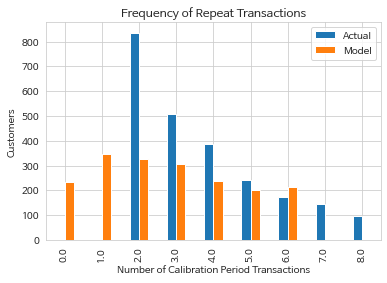

<IPython.core.display.Javascript object>

In [74]:
plot_period_transactions(BGF, max_frequency=7)
plt.show()

실제 데이터와 시뮬레이션 데이터가 일치하지는 않는 것 같다. 

    
  

 ##### 잘된 예시


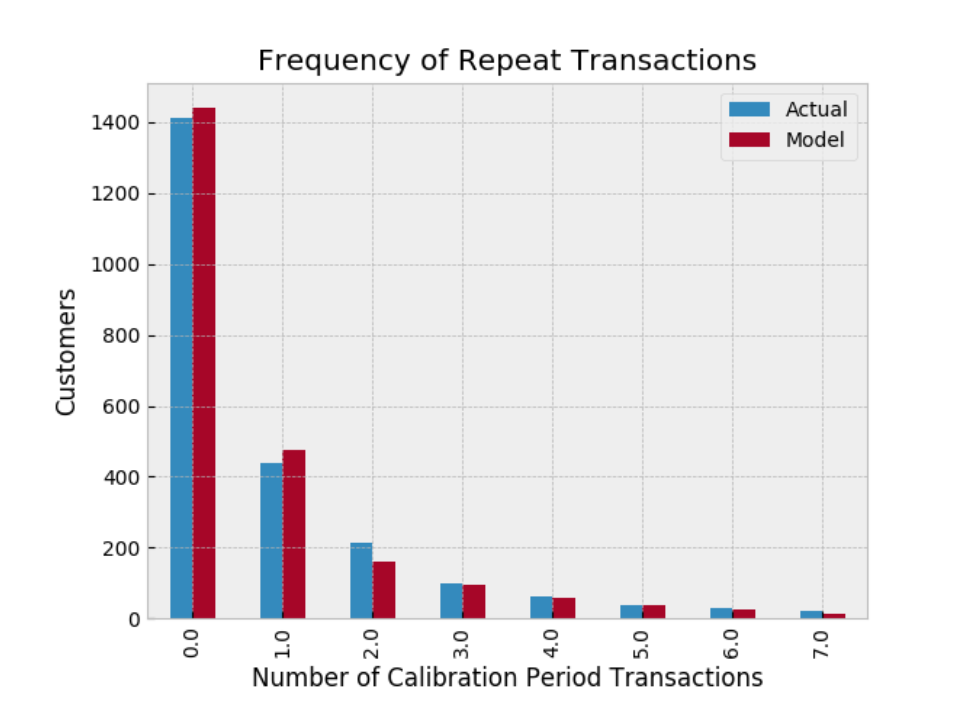

## 빈도 / 날짜순 그래프 시각화
```
3주 동안 매일 구매했던 고객으로부터 몇 달 동안 소식을 받지 못했습니다. 고객이 아직도 “살아있다”는 것은 무엇입니까? 
꽤 작습니다. 반면에 한 분기에 한 번 구매하고 지난 분기에 구매 한 고객은 아직 살아있을 가능성이 큽니다. 이 관계를 시각적으로 표시 할 수 있습니다. 
```

- 빈도 / 최근 값 행렬 은 다음 기간에 인위적인 고객이 기대하는 거래 수를 계산.
- **최근 거래가 성사 된 기간과 빈도(반복 거래 횟수)를 나타낸다.** 

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

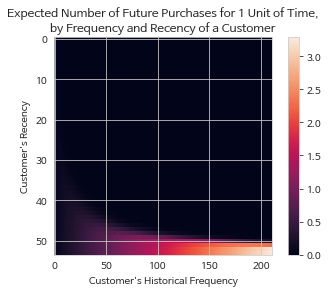

<IPython.core.display.Javascript object>

In [75]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(BGF)

- 고객이 200 번을 구매하고 가장 최근 구매가 50 + @주 였을 때 가장 적합한 고객 (오른쪽 하단)임을 예상해볼 수 있다. 
- Q. 오른쪽 상단에있는 고객들은 휴면 고객으로 판단할 수 있나? 

- 좌측 상단부터 내려오는 꼬리
    - 드물게 구입하는 고객들을 의미
    - 최근에 다시 유입되었으며 재구매할 가능성이 높은 고객 
- 아쉽지만 해당고객이 이탈하거나 재방문 사이에 있는지는 확실하지 않다.

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

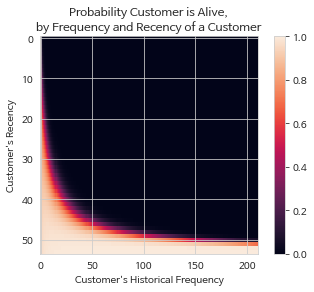

<IPython.core.display.Javascript object>

In [76]:
from lifetimes.plotting import plot_probability_alive_matrix

# 고객이 활발히 활동하고 있을 확률
plot_probability_alive_matrix(BGF)

모델 피팅과 예측은 다음 링크에서 추가적으로 실습해볼 수 있다.     
[LINK](https://2innnnn0.github.io/geultto/python_lifetime_1/)